### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Description of Methodology - a) Obtain
Types of data collected, sources, reliability

**Type of data collected**: Daily AQI data for India in city level. <br>

| Column | Description |
| --- | --- |
| City | The city of India |
| Date | The recorded date |
| PM2.5 | Particulate matter smaller than 2.5µm |
| PM10 | Particulate matter smaller than 10µm |
| NO | Nitrogen Monoxide |
| NO2 | Nitrogen Dioxide |
| NOx | Nitrogen Oxides |
| NH3 | Ammonia |
| CO | Carbon Monoxide |
| SO2 | Sulfur Dioxide |
| O3 | Ozone |
| Benzene | Benzene |
| Toluene | Toluene |
| Xylene | Xylene |
| AQI | AQI value |
| AQI_Bucket | Category of AQI value |

**Sources**: Compiled data from Kaggle (https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india) <br>
**Reliability**: The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India.

# Description of Methodology - b) Scrub
Processes done to clean the dataset, types of imputation used etc

In [46]:
# Read dataset
city_day = pd.read_csv("./AQI_Dataset/city_day.csv")

In [47]:
city_day.AQI_Bucket.value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

Good -         <= 50 <br>
Satisfactory - <=100 <br>
Moderate -     <=200 <br>
Poor -         <=300 <br>
Very poor -    <=400 <br>
Severe -       > 400

In [48]:
len(city_day)

29531

## Fix datetime format
To make sure the Date column convert into a proper date format and extract month information

In [49]:
city_day.Date = pd.to_datetime(city_day.Date, format = "%Y-%m-%d")
city_day["month"] = city_day.Date.dt.month

## Check NA
1. Target variable with NA will be dropped
2. Remaining variable will be calculated and process <br>
For those with > 10%, we will drop it as it will be likely to be bias. With <= 10% NA, mean imputation will work well

In [50]:
new_df = city_day[pd.notnull(city_day["AQI_Bucket"])].copy()
len(new_df)

24850

In [51]:
29531-24850

4681

In [52]:
missing_df = (new_df.isna().sum()/len(new_df)*100).reset_index().rename(columns = {"index": "column", 0:"missing_perc"}).sort_values(by="missing_perc")

In [53]:
missing_df = new_df.isna().sum().reset_index().rename(columns = {"index": "column", 0:"missing_value"})

In [54]:
missing_df["missing_perc"] = missing_df["missing_value"]/len(new_df)*100

In [55]:
data = [go.Bar(x = missing_df.column, y = missing_df.missing_perc, yaxis = "y1")]
line_list = [dict(type = "line", yref = "y", y0 = 10, y1 = 10, xref = "paper", x0 = 0, x1 = 1, line = dict(color = "Red", dash = "dash"))]
layout = go.Layout(xaxis = dict(title = "Column", tickangle=315), title="Missing data of each column (%)", shapes=line_list, yaxis = dict(title = "Missing percentage"))
fig = go.Figure(data=data, layout=layout)
# fig.write_image("fig1.png")
fig

In [56]:
to_drop = missing_df.loc[missing_df.missing_perc > 10, "column"].values.tolist()

In [57]:
new_df = new_df.drop(to_drop, axis = 1)

In [58]:
new_df

City       Date   PM2.5     NO    NO2    NOx     CO    SO2  \
28         Ahmedabad 2015-01-29   83.13   6.93  28.71  33.72   6.93  49.52   
29         Ahmedabad 2015-01-30   79.84  13.85  28.68  41.08  13.85  48.49   
30         Ahmedabad 2015-01-31   94.52  24.39  32.66  52.61  24.39  67.39   
31         Ahmedabad 2015-02-01  135.99  43.48  42.08  84.57  43.48  75.23   
32         Ahmedabad 2015-02-02  178.33  54.56  35.31  72.80  54.56  55.04   
...              ...        ...     ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27   15.02   7.68  25.06  19.54   0.47   8.55   
29527  Visakhapatnam 2020-06-28   24.38   3.42  26.06  16.53   0.52  12.72   
29528  Visakhapatnam 2020-06-29   22.91   3.45  29.53  18.33   0.48   8.42   
29529  Visakhapatnam 2020-06-30   16.64   4.05  29.26  18.80   0.52   9.84   
29530  Visakhapatnam 2020-07-01   15.00   0.40  26.85  14.05   0.59   2.10   

           O3    AQI    AQI_Bucket  month  
28      59.76  209.0          Poor      1  
29      97.07  328.0     Very Poor      1  
30     111.33  514.0        Severe      1  
31     102.70  782.0        Severe      2  
32     107.38  914.0        Severe      2  
...       ...    ...           ...    ...  
29526   23.30   41.0          Good      6  
29527   30.14   70.0  Satisfactory      6  
29528   30.96   68.0  Satisfactory      6  
29529   28.30   54.0  Satisfactory      6  
29530   17.05   50.0          Good      7  

[24850 rows x 12 columns]

In [59]:
to_impute = missing_df.loc[(missing_df.missing_perc <= 10) & (missing_df.missing_perc > 0), "column"].values.tolist()

In [60]:
for col in to_impute:
    new_df[col] = new_df[col].fillna(new_df[col].mean())

In [61]:
new_df

City       Date   PM2.5     NO    NO2    NOx     CO    SO2  \
28         Ahmedabad 2015-01-29   83.13   6.93  28.71  33.72   6.93  49.52   
29         Ahmedabad 2015-01-30   79.84  13.85  28.68  41.08  13.85  48.49   
30         Ahmedabad 2015-01-31   94.52  24.39  32.66  52.61  24.39  67.39   
31         Ahmedabad 2015-02-01  135.99  43.48  42.08  84.57  43.48  75.23   
32         Ahmedabad 2015-02-02  178.33  54.56  35.31  72.80  54.56  55.04   
...              ...        ...     ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27   15.02   7.68  25.06  19.54   0.47   8.55   
29527  Visakhapatnam 2020-06-28   24.38   3.42  26.06  16.53   0.52  12.72   
29528  Visakhapatnam 2020-06-29   22.91   3.45  29.53  18.33   0.48   8.42   
29529  Visakhapatnam 2020-06-30   16.64   4.05  29.26  18.80   0.52   9.84   
29530  Visakhapatnam 2020-07-01   15.00   0.40  26.85  14.05   0.59   2.10   

           O3    AQI    AQI_Bucket  month  
28      59.76  209.0          Poor      1  
29      97.07  328.0     Very Poor      1  
30     111.33  514.0        Severe      1  
31     102.70  782.0        Severe      2  
32     107.38  914.0        Severe      2  
...       ...    ...           ...    ...  
29526   23.30   41.0          Good      6  
29527   30.14   70.0  Satisfactory      6  
29528   30.96   68.0  Satisfactory      6  
29529   28.30   54.0  Satisfactory      6  
29530   17.05   50.0          Good      7  

[24850 rows x 12 columns]

In [62]:
new_df.duplicated().sum()

0

# Description of Methodology - c) Explore
Exploratory Data Analysis to investigate the data in terms of anomalies, and to check assumptions using statistics and graphical representations

### Descriptive Analysis

In [64]:
new_df.describe()

PM2.5            NO           NO2           NOx            CO  \
count  24850.000000  24850.000000  24850.000000  24850.000000  24850.000000   
mean      67.476613     17.622421     28.978391     32.289012      2.345267   
std       62.208948     22.245859     24.432532     29.542967      7.011570   
min        0.040000      0.030000      0.010000      0.000000      0.000000   
25%       29.560000      5.720000     12.090000     14.030000      0.590000   
50%       50.165000     10.075000     22.535000     25.720000      0.950000   
75%       79.507500     19.710000     37.910000     38.170000      1.530000   
max      914.940000    390.680000    362.210000    378.240000    175.810000   

                SO2            O3           AQI         month  
count  24850.000000  24850.000000  24850.000000  24850.000000  
mean      14.362933     34.912885    166.463581      6.281851  
std       17.215217     21.368849    140.696585      3.437407  
min        0.010000      0.010000     13.000000      1.000000  
25%        5.790000     19.640000     81.000000      3.000000  
50%        9.430000     32.060000    118.000000      6.000000  
75%       14.890000     45.397500    208.000000      9.000000  
max      186.080000    257.730000   2049.000000     12.000000

### Check for Outlier

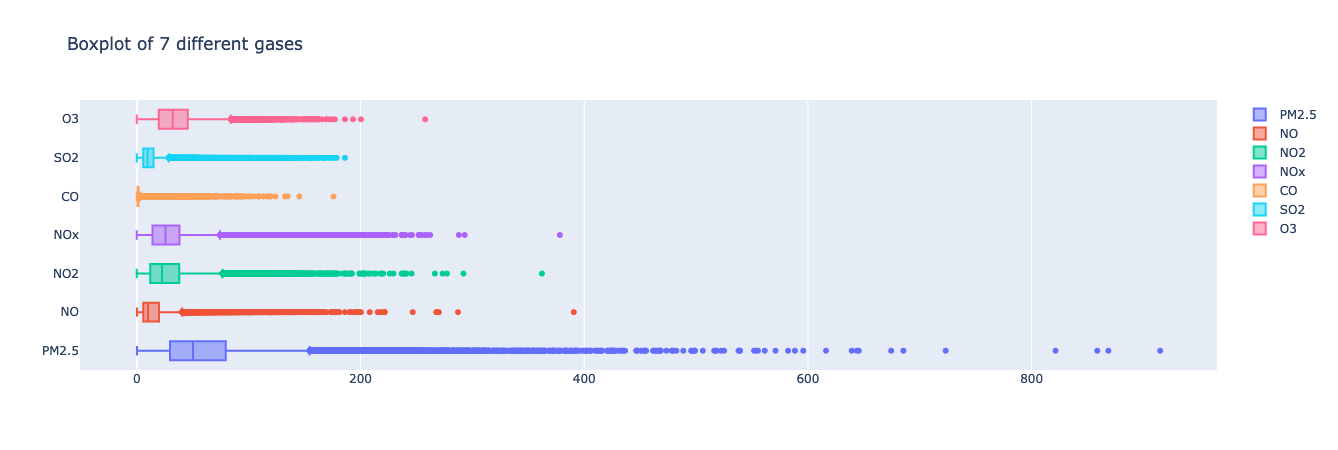

In [19]:
col_list = ["PM2.5", "NO", "NO2", "NOx", "CO", "SO2", "O3"]
data = []
for col in col_list:
    data.append(
        go.Box(x=new_df[col], name = col)
    )
layout = go.Layout(title = "Boxplot of 7 different gases")
fig = go.Figure(data=data, layout=layout)
# fig.write_image("fig2.png")
fig

In [20]:
def remove_outlier(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    lower = q1 - (1.5 * (q3-q1))
    upper = q3 + (1.5 * (q3-q1))
    return [x if (x >= lower and x <= upper) else np.NaN for x in col]

In [21]:
new_df2 = new_df.copy()
new_df2[["PM2.5", "NO", "NO2", "NOx", "CO", "SO2", "O3"]] = new_df2[["PM2.5", "NO", "NO2", "NOx", "CO", "SO2", "O3"]].apply(remove_outlier)

In [22]:
new_df2.isna().sum()

City             0
Date             0
PM2.5         2011
NO            2411
NO2           1138
NOx           1945
CO            2160
SO2           2481
O3             746
AQI              0
AQI_Bucket       0
month            0
dtype: int64

In [23]:
new_df2.shape

(24850, 12)

In [24]:
new_df2.dropna().shape

(17710, 12)

In [25]:
new_df2 = new_df2.dropna()

In [26]:
24850-17710

7140

In [27]:
new_df2.AQI_Bucket.value_counts()

Satisfactory    7780
Moderate        6791
Poor            1409
Good            1325
Very Poor        370
Severe            35
Name: AQI_Bucket, dtype: int64

In [28]:
def calc_skew(col):
    mean =  col.mean()
    median = col.median()
    std = col.std()
    skewness = 3*(mean-median)/std
    return skewness

In [29]:
skewness_table = new_df2[["PM2.5", "NO", "NO2", "NOx", "CO", "SO2", "O3"]].apply(calc_skew)

In [30]:
skewness_table = skewness_table.reset_index().rename(columns = {"index": "column", 0: "skewness"})

In [31]:
skewness_table

column  skewness
0  PM2.5  0.621378
1     NO  0.753712
2    NO2  0.645873
3    NOx  0.344347
4     CO  0.440794
5    SO2  0.689040
6     O3  0.302586

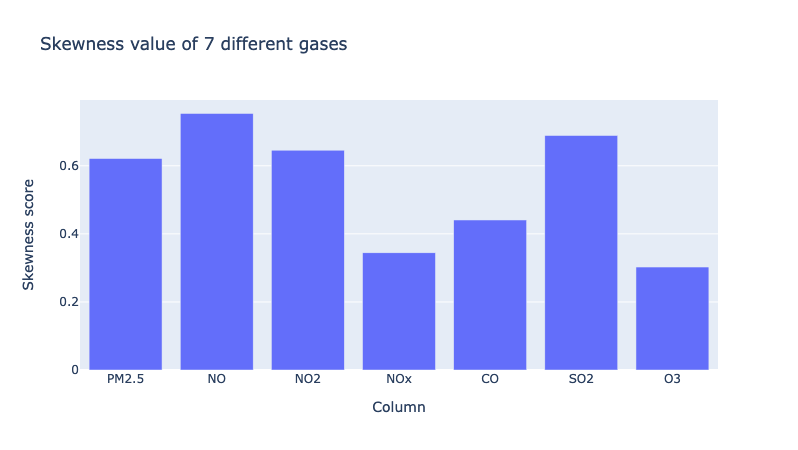

In [32]:
data = go.Bar(x=skewness_table.column, y=skewness_table.skewness)
layout = go.Layout(title = "Skewness value of 7 different gases", yaxis_title = "Skewness score", xaxis_title = "Column")
fig = go.Figure(data=data, layout=layout)
# fig.write_image("fig3.png")
fig

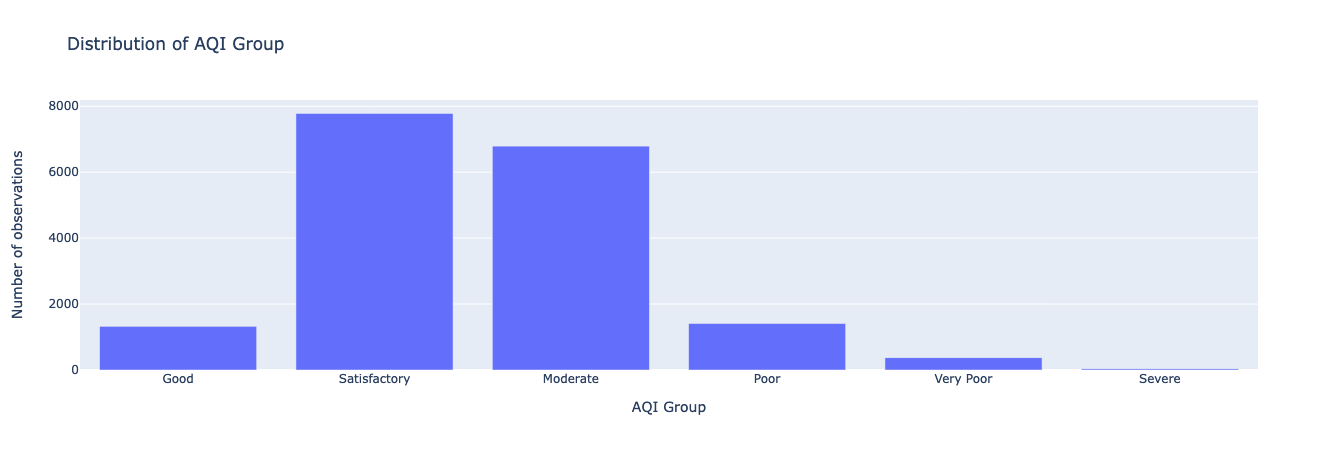

In [33]:
def rank_target(x):
    if x == "Good":
        return 1
    elif x == "Satisfactory":
        return 2
    elif x == "Moderate":
        return 3
    elif x == "Poor":
        return 4
    elif x == "Very Poor":
        return 5
    else:
        return 6
temp = new_df2.AQI_Bucket.value_counts().reset_index()
temp["rank"] = temp["index"].apply(rank_target)
temp = temp.sort_values(by="rank")
data = go.Bar(x = temp["index"], y = temp.AQI_Bucket)
layout = go.Layout(title = "Distribution of AQI Group", xaxis_title = "AQI Group", yaxis_title="Number of observations")
fig = go.Figure(data=data, layout=layout)
# fig.write_image("fig4.png")
fig

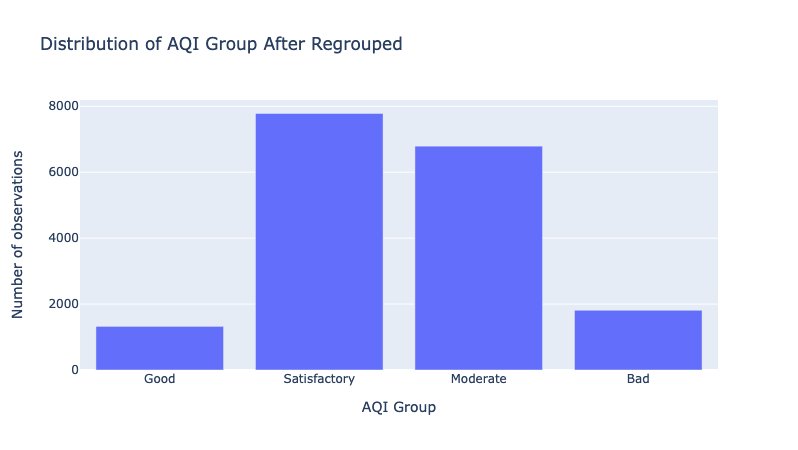

In [34]:
new_df2["New_AQI"] = ["Bad" if x in ["Poor", "Very Poor", "Severe"] else x for x in new_df2["AQI_Bucket"]]
temp2 = new_df2.New_AQI.value_counts().reset_index()
temp2["rank"] = temp2["index"].apply(rank_target)
temp2 = temp2.sort_values(by="rank")
data = go.Bar(x=temp2["index"], y=temp2["New_AQI"])
layout = go.Layout(title = "Distribution of AQI Group After Regrouped", xaxis_title = "AQI Group", yaxis_title="Number of observations")
fig = go.Figure(data=data, layout=layout)
# fig.write_image("fig5.png")
fig

In [35]:
new_df2.shape

(17710, 13)

In [36]:
new_df2.New_AQI.value_counts()

Satisfactory    7780
Moderate        6791
Bad             1814
Good            1325
Name: New_AQI, dtype: int64

In [37]:
new_df3 = []
for aqi in new_df2.New_AQI.unique():
    new_df3.append(new_df2[new_df2.New_AQI == aqi].sample(n = 1325, random_state = 22))

In [38]:
new_df3 = pd.concat(new_df3).reset_index(drop = True)

In [39]:
temp3 = new_df3.New_AQI.value_counts().reset_index()
temp3["rank"] = temp3["index"].apply(rank_target)
temp3 = temp3.sort_values(by="rank")
data = go.Bar(x=temp3["index"], y=temp3["New_AQI"])
layout = go.Layout(title = "Distribution of AQI Group After Downsample", xaxis_title = "AQI Group", yaxis_title="Number of observations")
fig = go.Figure(data=data, layout=layout)
fig.write_image("fig6.png")
fig

In [40]:
layout = go.Layout(yaxis_autorange = "reversed", title="Correlation Graph Between Features")
fig = go.Figure(go.Heatmap(z=new_df3.drop(["month", "AQI"], axis = 1).corr(), text=new_df3.drop(["month", "AQI"], axis = 1).corr(), x=["PM2.5", "NO", "NO2", "NOx", "CO", "SO2", "O3"], y=["PM2.5", "NO", "NO2", "NOx", "CO", "SO2", "O3"]), layout=layout)
# fig.write_image("fig7.png")
fig

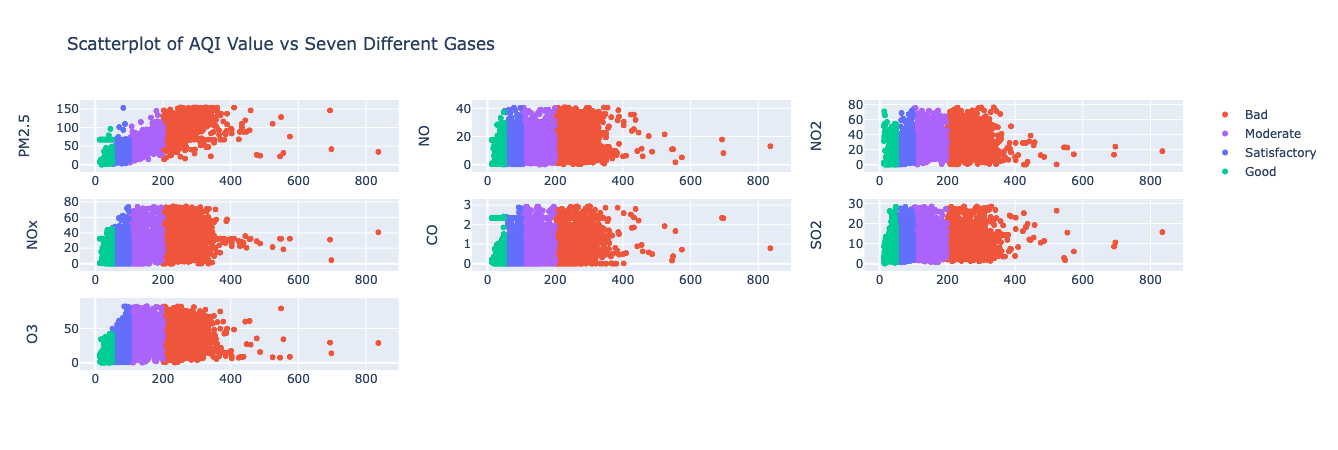

In [42]:
fig = make_subplots(rows=3, cols=3)
for col in ["PM2.5", "NO", "NO2", "NOx", "CO", "SO2", "O3"]:
    data = []
    if col == "PM2.5":
        row_val, col_val = 1, 1
    elif col == "NO":
        row_val, col_val = 1, 2
    elif col == "NO2":
        row_val, col_val = 1, 3
    elif col == "NOx":
        row_val, col_val = 2, 1
    elif col == "CO":
        row_val, col_val = 2, 2
    elif col == "SO2":
        row_val, col_val = 2, 3
    elif col == "O3":
        row_val, col_val = 3, 1
    for target in new_df3.New_AQI.unique():
        if target == "Good":
            color = "#00CC96"
        elif target == "Bad":
            color = "#EF553B"
        elif target == "Moderate":
            color = "#AB63FA"
        elif target == "Satisfactory":
            color = "#636EFA"
        subset_df = new_df3[new_df3.New_AQI == target]
        fig.append_trace(
            go.Scattergl(x = subset_df["AQI"], 
                         y = subset_df[col], 
                         mode="markers", 
                         marker_color = color, 
                         name = target, 
                         showlegend=True if col == "PM2.5" else False,
                         hovertemplate="AQI:%{x}<br>Gases:%{y}<extra></extra>"), 
            row=row_val, 
            col=col_val
        )
fig.update_layout(title="Scatterplot of AQI Value vs Seven Different Gases")
fig['layout']['yaxis']['title']='PM2.5'
fig['layout']['yaxis2']['title']='NO'
fig['layout']['yaxis3']['title']='NO2'
fig['layout']['yaxis4']['title']='NOx'
fig['layout']['yaxis5']['title']='CO'
fig['layout']['yaxis6']['title']='SO2'
fig['layout']['yaxis7']['title']='O3'
# fig.write_image("fig8.png", width = 1280)
fig.show()

In [43]:
new_df3.to_csv("./processed_df.csv", index = False)